# Project Capstone

### Introduction/Business Problem
Seattle has been one of the fastest growing large American cities for nearly a decade. According to Washington Office of Financial Management (OFM) survey, Seattle's population grew by 22.78% between 2010 and 2019. There is not doubt that more people are attracted to this booming city to establish their own businesses.

However, as the 15th largest city in the United States, Seattle is made up of over 30 neighborhoods. Each neighborhood has its own unique characteristics and the demographics of each neighborhood can also be very different. Therefore, it is difficult to determine where is the ideal location for a new business without an understanding of the target market. 

The main goal of this analysis is to provide essential data and assist a new business's location selection process. For illustration purpose, a new bakery is used as an example. This new bakery features top quality bread and pastries that are made with trendy ingredients. Its store environment is Instagram-worthy. Its target market is composed of young and educated individuals or families who have medium to high income level. 

This analysis goes through the data of each Seattle neighborhood from the following aspects:
1. median age
2. household income
3. crime rate
4. current market saturation 

### Data
The data used in this analysis includes:
1. Median age by Seattle neighborhoods (2010 U.S. Census)
2. Individual Income Tax Statistics by Washington zip code (2017 IRS data)
3. United State zip codes 
4. Seattle Police Department crime data (2018-present)
5. Foursquare location data that shows bakeries within 2000 meters radius in Seattle 


#### Median Age
The city of Seattle provides population profile data collected through 2010 U.S. Census. The data includes male, female and both gender's median age by Seattle Neighborhood District & Community Reporting Area. For this analysis, both gender combined median age is used. Below is the 1st 5 rows of the dataset.

In [1]:
!curl -o Census%202010%20Community%20Reporting%20Areas%20Subject%20Report.xlsx www.seattle.gov/Documents/Departments/OPCD/Demographics/AboutSeattle/Census%202010%20Community%20Reporting%20Areas%20Subject%20Report.xlsx

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4096k  100 4096k    0     0   764k      0  0:00:05  0:00:05 --:--:--  903k


In [2]:
import pandas as pd
nh_df = pd.read_excel('Census%202010%20Community%20Reporting%20Areas%20Subject%20Report.xlsx', index_col = 0, header = 2)
nh_df.head()

,Unnamed: 1,Arbor Heights,Unnamed: 3,Fauntleroy/Seaview,Unnamed: 5,West Seattle Junction/Genesee Hill,Unnamed: 7,Alki/Admiral,Unnamed: 9,North Delridge,...,Interbay,Unnamed: 99,Queen Anne,Unnamed: 101,Belltown,Unnamed: 103,Downtown Commercial Core,Unnamed: 105,Pioneer Square/International District,Unnamed: 107
Community Reporting Areas,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,Number,Percent,Number,Percent,Number,Percent,Number,Percent,Number,...,Number,Percent,Number,Percent,Number,Percent,Number,Percent,Number,Percent
Population,Total Population,6030,100,13723,100,17713,100,10542,100,4787,...,9802,100,35458,100,8601,100,4070,100,5333,100
Total Population: Ethnicity,Not Hispanic or Latino,5665,93.9469,13051,95.1031,16868,95.2295,10131,96.1013,4270,...,9107,92.9096,33822,95.3861,8069,93.8147,3856,94.742,5011,93.9621
NaN,Hispanic or Latino,365,6.05307,672,4.89689,845,4.77051,411,3.89869,517,...,695,7.09039,1636,4.61391,532,6.18533,214,5.25799,322,6.03788
Total Population: Not Hispanic or Latino by Race,White alone,4890,81.0945,11420,83.218,14803,83.5714,8957,84.9649,3294,...,7599,77.525,29002,81.7925,5844,67.9456,2838,69.7297,1589,29.7956


In [3]:
age_df = nh_df[nh_df.columns.drop(list(nh_df.filter(regex='Unnamed:')))] #drop columns starting with "Unnamed:"
age_df = age_df.loc[['Median age [3]']].transpose() #filter out median age row and transpose dataframe
age_df = age_df.rename(columns={"Median age [3]": "Median age"}) #rename column title
age_df = age_df.sort_values(by=['Median age'],ascending = False) #sort data by median age in ascending order
age_df.head() 

Community Reporting Areas,Median age
Madison Park,46.3538
Pioneer Square/International District,46.3125
Downtown Commercial Core,45.6827
Alki/Admiral,45.2893
Broadview/Bitter Lake,43.7719


In [4]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.style.use('ggplot')

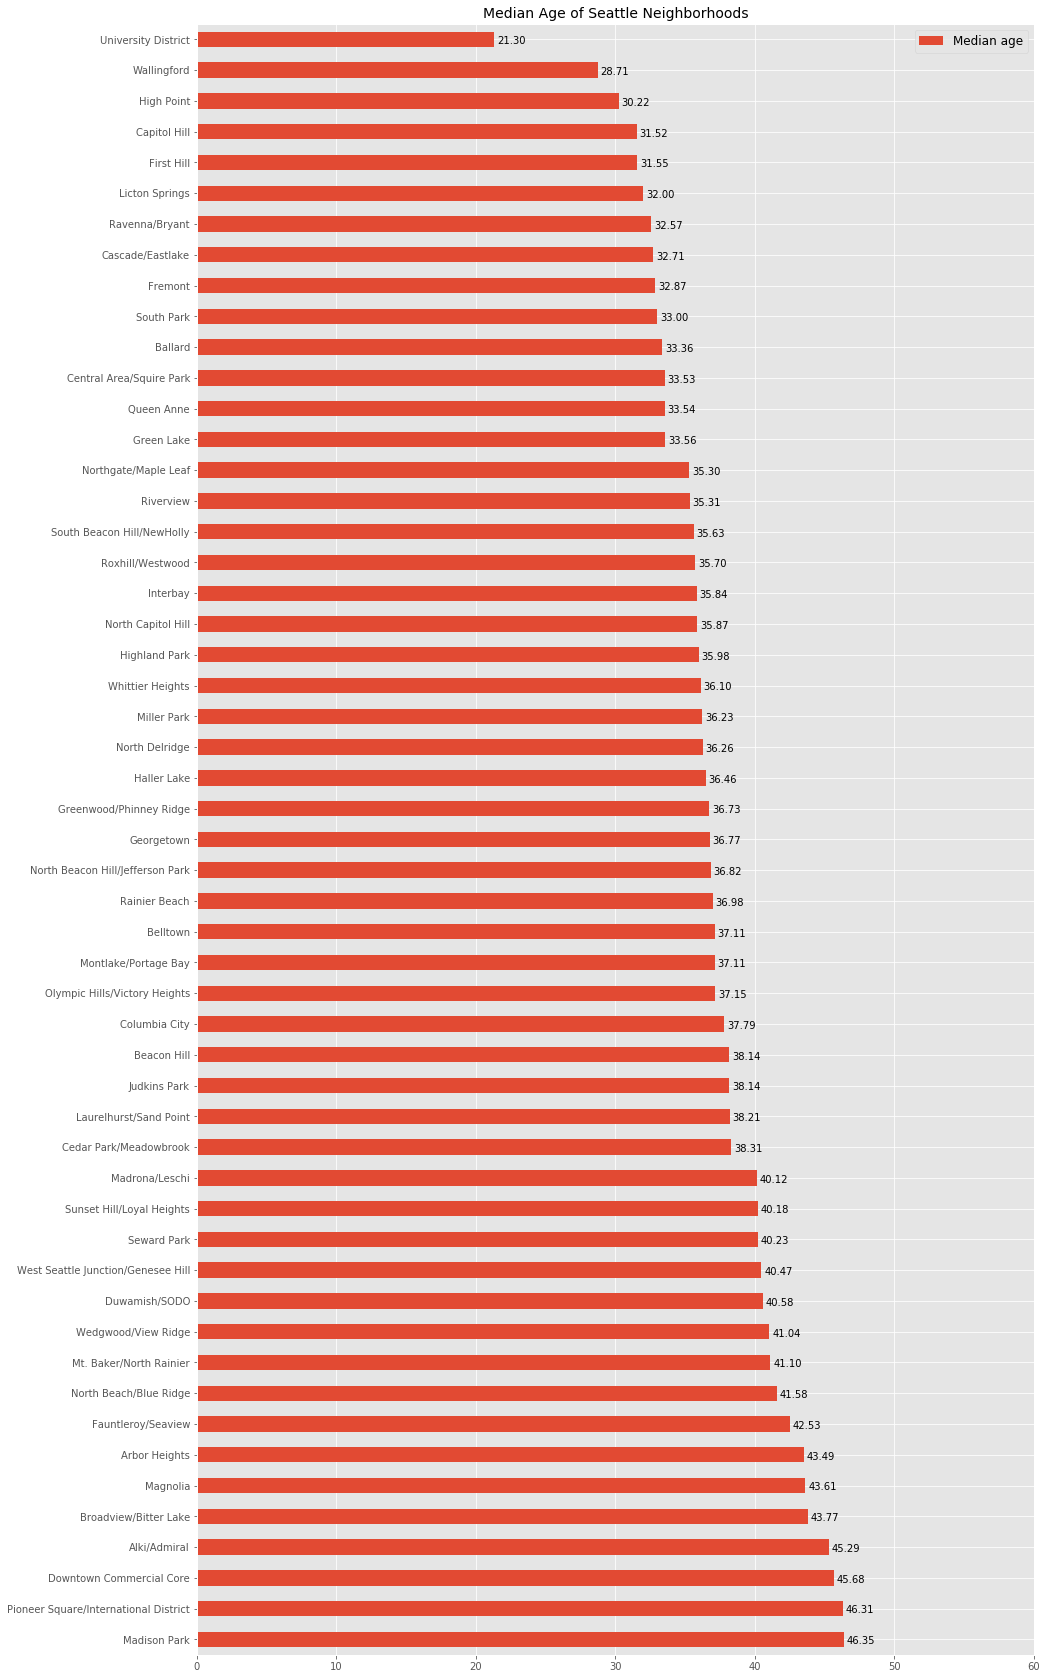

In [5]:
ax = age_df.plot(kind='barh', figsize=(15, 30), fontsize=10)

#add title and legend
ax.set_title("Median Age of Seattle Neighborhoods", fontsize=14)
ax.legend(fontsize=12)

plt.xticks(np.arange(0, 70, 10))

#display percentage labels
for label in ax.patches:
    ax.annotate("{:.2f}".format(label.get_width()),
                xy=(label.get_width()+0.2, label.get_y()+0.1))

#### Household Income
There is no median household income data by Seattle neighborhood readily available, but the Internal Revenue Services discloses income information by zip code for the State of Washington. 2017 data is the latestest information that is available. These income information is categorized into income brackets for each zip code. Seattle zip codes are then extracted by looking up in the U.S. zip code data for further analysis. Below is the first 5 row of the data.

In [6]:
!curl -o 17zp48wa.xlsx https://www.irs.gov/pub/irs-soi/17zp48wa.xlsx

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2909k  100 2909k    0     0  6812k      0 --:--:-- --:--:-- --:--:-- 6812k


In [7]:
AGI_df = pd.read_excel('17zp48wa.xlsx',header = 3)
AGI_df.head()

,ZIP\ncode [1],Size of adjusted gross income,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number of electronically filed returns,Number of computer prepared paper returns,Number with paid preparer's signature,Number of returns with direct deposit,...,Net investment income tax,Unnamed: 142,Tax due at time of filing [12],Unnamed: 144,Total overpayments,Unnamed: 146,Overpayments refunded [13],Unnamed: 148,Credited to next year's estimated tax,Unnamed: 150
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount
1,NaN,NaN,-1.0,-2.0,-3.0,-4.0,-5.0,-6.0,-7.0,-8.0,...,-140,-141,-142,-143,-144,-145,-146,-147,-148,-149
2,0,Total,3523830.0,1701350.0,1395810.0,377750.0,3102190.0,203070.0,1437800.0,2164220.0,...,137900,639018,793120,5246659,2644510,9037763,2564850,7196702,97380,1783620
3,0,"$1 under $25,000",973730.0,726850.0,110780.0,123850.0,833450.0,61800.0,334650.0,617880.0,...,20,180,96840,84694,805000,1409932,799160,1394809,6490,9917
4,0,"$25,000 under $50,000",836560.0,486020.0,189820.0,145800.0,741270.0,45500.0,309430.0,597310.0,...,0,0,129520,209317,700640,1693136,693060,1670311,10350,20768


In [8]:
AGI_df = AGI_df[['ZIP\ncode [1]', 'Size of adjusted gross income','Number of returns']] 
AGI_df.dropna(inplace = True) #drop rows containing n/a value
AGI_df = AGI_df.rename(columns = {"ZIP\ncode [1]": "Zip Code"}) #rename column title
AGI_df.head()

,Zip Code,Size of adjusted gross income,Number of returns
2,0,Total,3523830.0
3,0,"$1 under $25,000",973730.0
4,0,"$25,000 under $50,000",836560.0
5,0,"$50,000 under $75,000",529490.0
6,0,"$75,000 under $100,000",364060.0


In [9]:
Zip_df = pd.read_csv('zip_code_database.csv',index_col = 3) #read U.S. zip code csv and set primary_city as index
Zip_df = Zip_df[['zip']] 
Zip_df = Zip_df.loc[['Seattle']] #filter out Seattle zip codes only
Zip_df.reset_index(inplace = True) #reset numeric index
Zip_df.rename(columns = {'zip': 'Zip Code'}, inplace = True)
Zip_df.head()

,primary_city,Zip Code
0,Seattle,98101
1,Seattle,98102
2,Seattle,98103
3,Seattle,98104
4,Seattle,98105


In [10]:
import numpy as np
Income_df = pd.merge(AGI_df, Zip_df, on = 'Zip Code')
Income_df.head()

,Zip Code,Size of adjusted gross income,Number of returns,primary_city
0,98101,"$1 under $25,000",1260.0,Seattle
1,98101,"$25,000 under $50,000",1600.0,Seattle
2,98101,"$50,000 under $75,000",1230.0,Seattle
3,98101,"$75,000 under $100,000",960.0,Seattle
4,98101,"$100,000 under $200,000",2420.0,Seattle


In [11]:
Income_df.drop(['primary_city'],axis = 1, inplace = True)
Income_df.set_index('Size of adjusted gross income', inplace = True)

In [12]:
Income_df = pd.pivot_table(Income_df, values = 'Number of returns', index = ['Zip Code'], columns = ['Size of adjusted gross income'], aggfunc = np.sum)
print(Income_df.columns)
Income_df.head()

Index(['$1 under $25,000', '$100,000 under $200,000', '$200,000 or more',
       '$25,000 under $50,000', '$50,000 under $75,000',
       '$75,000 under $100,000'],
      dtype='object', name='Size of adjusted gross income')


Size of adjusted gross income,"$1 under $25,000","$100,000 under $200,000","$200,000 or more","$25,000 under $50,000","$50,000 under $75,000","$75,000 under $100,000"
Zip Code,,,,,,
98101,1260.0,2420.0,1650.0,1600.0,1230.0,960.0
98102,2600.0,3250.0,2040.0,3750.0,3150.0,1860.0
98103,5180.0,6060.0,4100.0,6410.0,5020.0,3200.0
98104,1900.0,1040.0,630.0,1770.0,940.0,590.0
98105,6020.0,2340.0,2650.0,3800.0,1850.0,1010.0


In [13]:
Income_df['Total Number of Return'] = Income_df.sum(axis=1)
Income_df.head()

Size of adjusted gross income,"$1 under $25,000","$100,000 under $200,000","$200,000 or more","$25,000 under $50,000","$50,000 under $75,000","$75,000 under $100,000",Total Number of Return
Zip Code,,,,,,,
98101,1260.0,2420.0,1650.0,1600.0,1230.0,960.0,9120.0
98102,2600.0,3250.0,2040.0,3750.0,3150.0,1860.0,16650.0
98103,5180.0,6060.0,4100.0,6410.0,5020.0,3200.0,29970.0
98104,1900.0,1040.0,630.0,1770.0,940.0,590.0,6870.0
98105,6020.0,2340.0,2650.0,3800.0,1850.0,1010.0,17670.0


In [14]:
IncomePerc_df = Income_df.divide(Income_df['Total Number of Return'], axis = 0, fill_value=None) #convert value to percentage for each row
IncomePerc_df.head()

Size of adjusted gross income,"$1 under $25,000","$100,000 under $200,000","$200,000 or more","$25,000 under $50,000","$50,000 under $75,000","$75,000 under $100,000",Total Number of Return
Zip Code,,,,,,,
98101,0.138158,0.265351,0.180921,0.175439,0.134868,0.105263,1.0
98102,0.156156,0.195195,0.122523,0.225225,0.189189,0.111712,1.0
98103,0.172840,0.202202,0.136803,0.213881,0.167501,0.106773,1.0
98104,0.276565,0.151383,0.091703,0.257642,0.136827,0.085881,1.0
98105,0.340690,0.132428,0.149972,0.215054,0.104697,0.057159,1.0


In [15]:
IncomePerc_df['\$1 under \$50,000']=IncomePerc_df.loc[IncomePerc_df['$25,000 under $50,000']>0,['$1 under $25,000','$25,000 under $50,000']].sum(axis=1)
IncomePerc_df['\$50,000 under \$100,000']=IncomePerc_df.loc[IncomePerc_df['$25,000 under $50,000']>0,['$50,000 under $75,000','$75,000 under $100,000']].sum(axis=1)
IncomePerc_df['\$100,000 under \$200,000']=IncomePerc_df.loc[IncomePerc_df['$25,000 under $50,000']>0,['$100,000 under $200,000','$200,000 or more']].sum(axis=1)

df_income = IncomePerc_df[['\$1 under \$50,000','\$50,000 under \$100,000', '\$100,000 under \$200,000']].sort_values(by=['\$50,000 under \$100,000'])
df_income.head()

Size of adjusted gross income,"\$1 under \$50,000","\$50,000 under \$100,000","\$100,000 under \$200,000"
Zip Code,,,
98164,0.250000,0.000000,0.750000
98105,0.555744,0.161856,0.282400
98177,0.356731,0.206731,0.436538
98199,0.326087,0.214783,0.459130
98112,0.338942,0.217147,0.443910


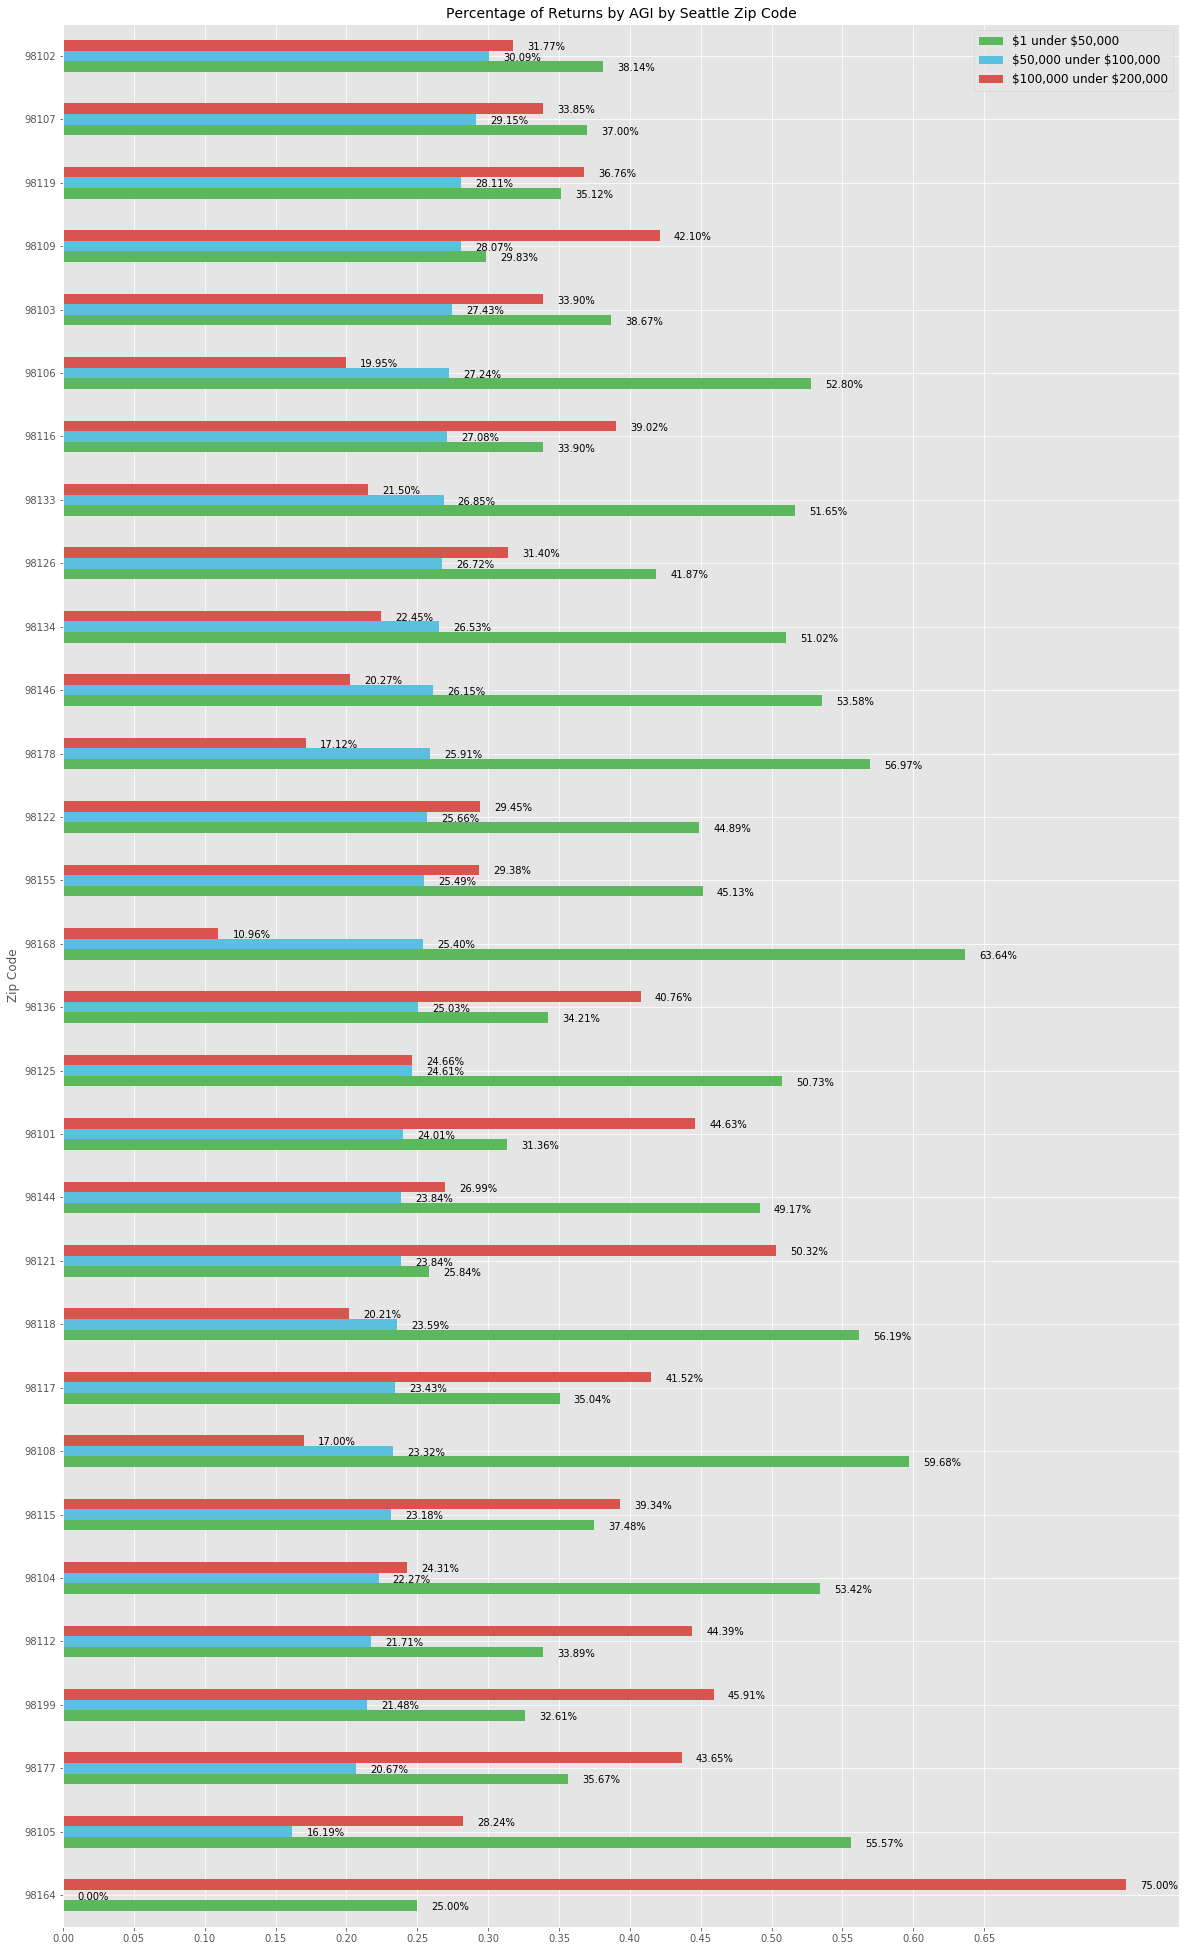

In [16]:
ax = df_income.plot(kind='barh', figsize=(20, 35), color=['#5cb85c','#5bc0de','#d9534f'],fontsize=10)

#add title and legend
ax.set_title("Percentage of Returns by AGI by Seattle Zip Code", fontsize=14)
ax.legend(fontsize=12, loc='upper right')

plt.xticks(np.arange(0, 0.7, 0.05))

#display percentage labels
for label in ax.patches:
    ax.annotate("{:.2%}".format(label.get_width()),
                xy=(label.get_width()+0.01, label.get_y()+0.01))

In [17]:
import folium

In [18]:
df_AGI=df_income.reset_index()
df_AGI.head()

Size of adjusted gross income,Zip Code,"\$1 under \$50,000","\$50,000 under \$100,000","\$100,000 under \$200,000"
0,98164,0.250000,0.000000,0.750000
1,98105,0.555744,0.161856,0.282400
2,98177,0.356731,0.206731,0.436538
3,98199,0.326087,0.214783,0.459130
4,98112,0.338942,0.217147,0.443910


In [19]:
df_AGI.dtypes

Size of adjusted gross income
Zip Code                       int64
\$1 under \$50,000           float64
\$50,000 under \$100,000     float64
\$100,000 under \$200,000    float64
dtype: object

In [20]:
Seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)
Seattle_geo = r'zip-codes.geojson' #geojson file

# generate choropleth map
folium.Choropleth(
    geo_data=Seattle_geo,
    data=df_AGI,
    columns=['Zip Code', '\$50,000 under \$100,000'],
    key_on='feature.properties.GEOID10',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Percentage of Returns with AGI between \$50,000 and \$100,000').add_to(Seattle_map)

# display map
Seattle_map

#### Crime Data
Seattle Police Department shares Seattle crime data from 2008 through the present. The dataset includes incident date and time, crime type, neighborhood, longitude and latitude information. The first 5 row of the data is shown below.

In [21]:
crime_df = pd.read_csv('SPD_Crime_Data__2008-Present.csv') #data downloaded from https://data.seattle.gov/Public-Safety/SPD-Crime-Data-2008-Present/tazs-3rd5
crime_df = crime_df[['Crime Against Category','Offense Parent Group', 'MCPP', 'Longitude', 'Latitude']]
crime_df.head()

,Crime Against Category,Offense Parent Group,MCPP,Longitude,Latitude
0,PROPERTY,LARCENY-THEFT,ALASKA JUNCTION,-122.381494,47.556545
1,PROPERTY,LARCENY-THEFT,ALASKA JUNCTION,-122.379319,47.552003
2,PROPERTY,MOTOR VEHICLE THEFT,ALASKA JUNCTION,-122.379319,47.552003
3,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,ALASKA JUNCTION,-122.376135,47.569292
4,PROPERTY,FRAUD OFFENSES,ALASKA JUNCTION,-122.392108,47.569360


In [22]:
crime_df.groupby(['Offense Parent Group']).count()

,Crime Against Category,MCPP,Longitude,Latitude
Offense Parent Group,,,,
ANIMAL CRUELTY,28,28,28,28
ARSON,1335,1335,1335,1335
ASSAULT OFFENSES,120071,120071,120071,120071
BAD CHECKS,6602,6602,6602,6602
BRIBERY,15,15,15,15
BURGLARY/BREAKING&ENTERING,91335,91335,91335,91335
COUNTERFEITING/FORGERY,4534,4534,4534,4534
CURFEW/LOITERING/VAGRANCY VIOLATIONS,875,875,875,875
DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,77120,77120,77120,77120


In [23]:
#one hot encoding
crime_onehot = pd.get_dummies(crime_df[['Offense Parent Group']], prefix="", prefix_sep="")
crime_onehot['MCPP'] = crime_df['MCPP'] #add neighborhood column back into dataframe
fixed_columns = [crime_onehot.columns[-1]] + list(crime_onehot.columns[:-1])#move neighborhood column to the front
crime_onehot = crime_onehot[fixed_columns] 
crime_onehot.head()

,MCPP,ANIMAL CRUELTY,ARSON,ASSAULT OFFENSES,BAD CHECKS,BRIBERY,BURGLARY/BREAKING&ENTERING,COUNTERFEITING/FORGERY,CURFEW/LOITERING/VAGRANCY VIOLATIONS,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,...,MOTOR VEHICLE THEFT,PEEPING TOM,PORNOGRAPHY/OBSCENE MATERIAL,PROSTITUTION OFFENSES,ROBBERY,SEX OFFENSES,"SEX OFFENSES, CONSENSUAL",STOLEN PROPERTY OFFENSES,TRESPASS OF REAL PROPERTY,WEAPON LAW VIOLATIONS
0,ALASKA JUNCTION,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ALASKA JUNCTION,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ALASKA JUNCTION,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,ALASKA JUNCTION,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,ALASKA JUNCTION,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
crime_onehot = crime_onehot.groupby(['MCPP']).sum()
crime_onehot.head()

,ANIMAL CRUELTY,ARSON,ASSAULT OFFENSES,BAD CHECKS,BRIBERY,BURGLARY/BREAKING&ENTERING,COUNTERFEITING/FORGERY,CURFEW/LOITERING/VAGRANCY VIOLATIONS,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,DRIVING UNDER THE INFLUENCE,...,MOTOR VEHICLE THEFT,PEEPING TOM,PORNOGRAPHY/OBSCENE MATERIAL,PROSTITUTION OFFENSES,ROBBERY,SEX OFFENSES,"SEX OFFENSES, CONSENSUAL",STOLEN PROPERTY OFFENSES,TRESPASS OF REAL PROPERTY,WEAPON LAW VIOLATIONS
MCPP,,,,,,,,,,,,,,,,,,,,,
ALASKA JUNCTION,0.0,11.0,1355.0,102.0,0.0,1476.0,69.0,2.0,1091.0,257.0,...,853.0,3.0,6.0,13.0,232.0,51.0,2.0,28.0,248.0,47.0
ALKI,0.0,4.0,600.0,34.0,1.0,505.0,14.0,1.0,530.0,114.0,...,347.0,1.0,2.0,0.0,41.0,20.0,1.0,10.0,43.0,39.0
BALLARD NORTH,0.0,36.0,1865.0,146.0,0.0,2407.0,107.0,6.0,1884.0,389.0,...,1294.0,6.0,8.0,9.0,272.0,82.0,2.0,60.0,273.0,96.0
BALLARD SOUTH,0.0,32.0,3071.0,216.0,0.0,2985.0,178.0,11.0,2398.0,718.0,...,1809.0,9.0,3.0,1.0,394.0,96.0,4.0,111.0,866.0,135.0
BELLTOWN,0.0,17.0,3899.0,96.0,1.0,1623.0,54.0,101.0,1897.0,443.0,...,555.0,2.0,0.0,88.0,562.0,137.0,1.0,107.0,642.0,247.0


In [25]:
#select relavant crimes
crime_onehot['Total'] = crime_onehot.loc[crime_onehot['BURGLARY/BREAKING&ENTERING']>=0,['ARSON', 'BURGLARY/BREAKING&ENTERING', 'DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY', 'DRUG/NARCOTIC OFFENSES', 'HOMICIDE OFFENSES', 'KIDNAPPING/ABDUCTION', 'LARCENY-THEFT', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'STOLEN PROPERTY OFFENSES','TRESPASS OF REAL PROPERTY']].sum(axis=1) #add total column
crime_onehot.sort_values(by='Total', inplace=True) #sort total column in ascending order
crime_onehot.head(10)

,ANIMAL CRUELTY,ARSON,ASSAULT OFFENSES,BAD CHECKS,BRIBERY,BURGLARY/BREAKING&ENTERING,COUNTERFEITING/FORGERY,CURFEW/LOITERING/VAGRANCY VIOLATIONS,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,DRIVING UNDER THE INFLUENCE,...,PEEPING TOM,PORNOGRAPHY/OBSCENE MATERIAL,PROSTITUTION OFFENSES,ROBBERY,SEX OFFENSES,"SEX OFFENSES, CONSENSUAL",STOLEN PROPERTY OFFENSES,TRESPASS OF REAL PROPERTY,WEAPON LAW VIOLATIONS,Total
MCPP,,,,,,,,,,,,,,,,,,,,,
INTERNATIONAL DISTRICT - EAST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
COMMERCIAL HARBOR ISLAND,0.0,0.0,41.0,2.0,0.0,42.0,0.0,0.0,30.0,36.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,16.0,1.0,196.0
COMMERCIAL DUWAMISH,0.0,2.0,66.0,2.0,0.0,41.0,2.0,0.0,66.0,76.0,...,0.0,0.0,0.0,4.0,2.0,0.0,6.0,9.0,8.0,343.0
PIGEON POINT,0.0,0.0,141.0,12.0,0.0,149.0,9.0,0.0,97.0,13.0,...,0.0,0.0,0.0,18.0,4.0,0.0,6.0,12.0,7.0,737.0
EASTLAKE - EAST,0.0,3.0,89.0,4.0,0.0,177.0,4.0,0.0,127.0,20.0,...,0.0,0.0,0.0,10.0,7.0,0.0,14.0,45.0,10.0,1080.0
GENESEE,0.0,7.0,432.0,29.0,0.0,246.0,14.0,0.0,250.0,47.0,...,0.0,0.0,12.0,86.0,9.0,1.0,8.0,52.0,31.0,1766.0
MADISON PARK,0.0,1.0,184.0,28.0,0.0,426.0,12.0,0.0,286.0,78.0,...,0.0,0.0,0.0,17.0,10.0,0.0,5.0,64.0,14.0,2177.0
SOUTH DELRIDGE,0.0,7.0,583.0,19.0,0.0,325.0,18.0,5.0,425.0,44.0,...,0.0,1.0,14.0,124.0,26.0,0.0,31.0,136.0,60.0,2427.0
SOUTH BEACON HILL,0.0,12.0,684.0,36.0,0.0,752.0,19.0,0.0,469.0,77.0,...,0.0,2.0,0.0,120.0,38.0,2.0,22.0,51.0,51.0,2629.0


In [26]:
MCPP_geo = r'spd-mcpp-areas.geojson' # geojson file

SPD_Crime_map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)

crime_onehot.reset_index(inplace=True)

# generate choropleth map
folium.Choropleth(
    geo_data=MCPP_geo,
    data=crime_onehot,
    columns=['MCPP', 'Total'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in Seattle 2018-present').add_to(SPD_Crime_map)

# display map
SPD_Crime_map

#### Current Market Saturation
Foursquare API call is used to look up existing venues in the bakery category within 2,000 meter radius of Seattle. The result includes zip codes, longitude, and latitude of each venue for neighborhood related analysis purpose. 

In [27]:
CLIENT_ID = 'ID removed' # your Foursquare ID
CLIENT_SECRET = 'Secret removed' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100

In [28]:
search_query = 'bakery'
radius = 600000
latitude = 47.6062
longitude = -122.3321
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [29]:
import requests
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f2ce6a55871456639b44216'},
 'response': {'venues': [{'id': '47f245d1f964a520974e1fe3',
    'name': 'Three Girls Bakery',
    'location': {'address': '1514 Pike Pl',
     'crossStreet': 'in Post Alley',
     'lat': 47.60906474579556,
     'lng': -122.34091319298555,
     'labeledLatLngs': [{'label': 'display',
       'lat': 47.60906474579556,
       'lng': -122.34091319298555},
      {'label': 'entrance', 'lat': 47.609094, 'lng': -122.340702}],
     'distance': 734,
     'postalCode': '98101',
     'cc': 'US',
     'city': 'Seattle',
     'state': 'WA',
     'country': 'United States',
     'formattedAddress': ['1514 Pike Pl (in Post Alley)',
      'Seattle, WA 98101',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d16a941735',
      'name': 'Bakery',
      'pluralName': 'Bakeries',
      'shortName': 'Bakery',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_',
       'suffix': '.png'},
      'primary'

In [30]:
import pandas as pd
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = pd.json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id,location.neighborhood
0,47f245d1f964a520974e1fe3,Three Girls Bakery,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",v-1596778092,False,1514 Pike Pl,in Post Alley,47.609065,-122.340913,"[{'label': 'display', 'lat': 47.60906474579556...",...,United States,"[1514 Pike Pl (in Post Alley), Seattle, WA 981...",1910007,https://www.grubhub.com/restaurant/three-girls...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
1,4aae9e5cf964a520a36220e3,Sugar Bakery + Cafe,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",v-1596778092,False,1014 Madison St,btwn Terry & Boren,47.609149,-122.325790,"[{'label': 'display', 'lat': 47.60914869775373...",...,United States,"[1014 Madison St (btwn Terry & Boren), Seattle...",418928,https://www.grubhub.com/restaurant/sugar-baker...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
2,4a95c280f964a5208a2420e3,Specialty’s Café & Bakery,"[{'id': '4bf58dd8d48988d1c5941735', 'name': 'S...",v-1596778092,False,701 5th Avenue,4th & Columbia (in Columbia Center),47.604667,-122.330517,"[{'label': 'display', 'lat': 47.60466704, 'lng...",...,United States,[701 5th Avenue (4th & Columbia (in Columbia C...,2176353,https://www.grubhub.com/restaurant/specialtys-...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,553301538,NaN
3,4ca7b9f4f47ea143a9d46d21,Fuji Bakery,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",v-1596778092,False,526 S King St,NaN,47.598356,-122.326419,"[{'label': 'display', 'lat': 47.59835648956966...",...,United States,"[526 S King St, Seattle, WA 98104, United States]",1810363,https://www.grubhub.com/restaurant/fuji-bakery...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
4,427ff980f964a520d8211fe3,Macrina Bakery,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",v-1596778092,False,2408 1st Ave,btwn Wall & Battery,47.614406,-122.348155,"[{'label': 'display', 'lat': 47.61440633728934...",...,United States,"[2408 1st Ave (btwn Wall & Battery), Seattle, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_venue=dataframe.groupby(by="location.postalCode").count()
df_venue.rename(columns={'id': 'Bakery Count'},inplace=True)
df_venue.head()

,Bakery Count,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id,location.neighborhood
location.postalCode,,,,,,,,,,,,,,,,,,,,,
98005,1,1,1,1,1,1,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
98052,2,2,2,2,2,2,0,2,2,2,...,2,2,2,2,2,2,2,2,0,0
98101,10,10,10,10,10,8,6,10,10,10,...,10,10,1,1,1,1,1,1,0,0
98102,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,0
98103,3,3,3,3,3,3,1,3,3,3,...,3,3,2,2,2,2,2,2,1,0


In [32]:
df_venue.reset_index(inplace=True)

Venue_map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)

# generate choropleth map
folium.Choropleth(
    geo_data=Seattle_geo,
    data=df_venue,
    columns=['location.postalCode', 'Bakery Count'],
    key_on='feature.properties.ZCTA5CE10',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Bakery Count by zip code').add_to(Venue_map)

# display map
Venue_map

### Conclusion and future directions
After evaluating the median age, annual income (AGI), crime rate, and current market saturation of each Seattle neighborhood using Pandas dataframes, bar charts and choropleth maps, the general recommendation for a new bakery will be in Ballard, Queen Anne, Alki, Green Lake and Delridge because they meet three or more target market criteria of the bakery. 

However, this conclusion is drawn based on the available data I could find on the Internet and it is just a general overview of the Seattle market. With more and better data, I would like to improve the accuracy of the analysis and further narrow down the location selection by doing the following:

1. Consider the population size of each neighborhood and look at crime rate per capita and number of bakeries per capita.
2. Factor in average/median rental cost of each neighborhood since it is usually the biggest cost item of a new business.
3. Research on zoning and permit requirements of each neighborhood. The low market saturation in some of the neighborhoods could be caused by zoning rules. Then such limitation can be considered by the new business.
4. Update the median age and AGI analysis using more recent U.S. Census and IRS data.
5. Improve the data availability of current market saturation by using a different API such as Yelp.
